<img src='./images/LogoWekeo_Copernicus_RGB_0.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='20%'></img>

**Author:** Luigi Selmi <br>
**Copyright:** 2022 Luigi Selmi <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h3>Solar radiation</h3></div>

# INTRODUCTION
The solar irradiance represents the energy per unit time and unit area received from the sun at the ground level in the form of electromagnetic radiation. It is measured in watts per square metre ($W/m^2$). The CAMS service returns the solar radiation, that is the solar irradiance integrated over a period of time, whose unit is watts hour per square metre ($Wh/m^2$). The solar irradiance depends on the solar cycle that has a period of 11 years in which the difference between the high peak and the low one is on average 0.1 %. The solar irradiance is partly scattered and absorbed by the atmosphere, aerosols and clouds. The monitoring of the solar irradiance provides us the information about the amount of energy that hits the Earth surface and how it is distributed. The knowledge of how the solar irradiance is distributed is used to plan the deployment of thermal and photovoltaic solar power plants.

### Data used

| Product Description | Product Navigator | WEkEO HDA ID | WEkEO metadata |
|:--------------------:|:-------------:|:-----------------:|:-----------------:|
| CAMS solar radiation time-series | <a href="https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-solar-radiation-timeseries?tab=overview" target="_blank">link</a> | EO:ECMWF:DAT:CAMS_SOLAR_RADIATION_TIMESERIES | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AECMWF%3ADAT%3ACAMS_SOLAR_RADIATION_TIMESERIES" target="_blank">link</a> |

### Learning outcomes

In this notebook you will learn;

1. How the solar irradiance is retrieved 
2. How the solar irradiance is measured in the presence of clouds
3. How to download and plot the solar radiation data for a place on the Earth's surface in a given time interval
4. As an exercise, you will find out the day of the strongest irradiance attenuation in the given time interval 

### Outline

The solar irradiance provided by the CAMS is not the result of direct measurements at the ground level, e.g. by [pyranometers](https://en.wikipedia.org/wiki/Pyranometer). The CAMS solar irradiance is the output of radiative transfer models that take as input the optical properties of the atmosphere, the albedo of the Earth's surface and the cloud cover observed from satellites, to compute the solar irradiance received on the ground. We will briefly review the process and then we will use the Harmonized Data Access (HDA) API to fetch the data and visualize a sample time-series for a location, for one month with a step of 1 hour. Finally we will find out the day with the lowest value of the solar radiation in that time interval.    

<div class="alert alert-info" role="alert">

<a id='TOC_TOP'></a>Contents

</div>
    
 1. [The CAMS solar radiation time-series](#The-CAMS-solar-radiation-time-series)
 2. [The CAMS Clear-Sky and All-Sky radiation transfer models](#The-CAMS-radiation-transfer-models)
 3. [The Harmonised Data Access API](#The-Harmonised-Data-Access-API)
 4. [Plotting the solar radiation time-series](#Plotting-the-solar-radiation-time-series)
 5. [Strongest solar radiation attenuation](#Strongest-solar-radiation-attenuation)
 6. [References](#References)


<hr>

<div class="alert alert-info" role="alert">

## <a id='The-CAMS-solar-radiation-time-series'></a>1. The CAMS solar radiation time-series
[Back to top](#TOC_TOP)

</div>

The CAMS provides the [solar radiation time-series](https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-solar-radiation-timeseries) dataset of the downwelling [solar irradiance](https://en.wikipedia.org/wiki/Solar_irradiance) at ground level on horizontal surfaces, integrated over the whole solar spectrum. As said, the CAMS solar irradiance is the output of radiatve transfer models. A base model, called clear-sky model, takes into account only the optical properties of the atmosphere and some of its constituents that have strong absorption characteristics within the solar spectrum, such as water vapour, ozone, and aerosol particles. Since at any given time 67% of the Earth's surface is covered by clouds, another radiative transfer model, called all-sky model, is used to compute the additional reduction of the solar irradiance received at the ground level as a consequence of the cloud cover. The information about the cloud cover used to compute the all-sky irradiance is extracted from the imagery of the [Meteosat 2nd Generation](https://www.eumetsat.int/meteosat-second-generation) (MSG) satellites. The Meteosat Second Generation is a constellation of geostationary satellites in orbit at 36000 km above the equator at 0° longitude. The main MSG payload is the SEVIRI instrument that collects the radiation received from the Earth in 12 spectral bands, 4 in the visible part of the spectrum and 8 in the IR part of the spectrum.The data collected in these 12 bands are used to determine the atmospheric motion vectors, the wind field at different heights, the cloud cover and type, the optical depth, the water vapour and ozone content.

|![Visible band centred on 0.6µm - Channel 1](images/msg_ch_01_vis.jpg)|![Infrared band centred on 3.9µm - Channel 4](images/msg_ch_04_ir.jpg) |
|:--:|:--:|
|*Left: visible band centred on 0.6 µm - SEVIRI channel 1*|*Right: infrared band centred on 3.9 µm - SEVIRI channel 4, (Credit: EUMETSAT)*|

<div class="alert alert-info" role="alert">

## <a id='The-CAMS-radiation-transfer-models'></a>2. The CAMS radiation transfer models
[Back to top](#TOC_TOP)

</div>

Since the energy emitted by the sun is known, it is possible to compute the solar irradiance that should arrive at the ground level at any location and at any given time by using radiative transfer models.  

|![CAMS radiation transfer models](images/cams_radiation_transfer_model.png)|
|:--:|
|*Clear-sky and All-sky radiation transfer models - (Credit: ECMWF)*|

### Clear-sky solar irradiance
The CAMS Clear-Sky radiative transfer model is used to compute the solar irradiance at the ground level under cloud-free skies, taking into account the reduction (extinction) due to the scattering and absorption effects of the atmosphere and in particular of some of its constituents, water vapour, ozone and aerosol particles. The albedo of the Earth's surface and the vertical profiles of the atmosphere's temperature and pressure are also used as input of the Clear-Sky model.

|![Solar Spectrum](images/solar_spectrum.png)| 
|:--:|
|*The Solar Spectrum (Credit: Wikipedia)*|

### All-Sky solar irradiance
As everyone knows by experience, clouds have a strong impact on the solar irradiance that arrives at the ground level. Since the Meteosat satellites provide data about the cloud coverage in a continuous way, the All-Sky model is used to compute the reduction of the solar irradiance that resulted from the Clear-Sky model due to the cloud cover. The reduction are computed from the physical characteristics of the clouds that can be inferred from their reflectance. Since the MSG satellites cover only Europe, Africa, the Atlantic Ocean and the Middle East, the all-sky solar irradiance values are not available in other regions. More information about the computational models is available in the referred papers at the end of the notebook.

<div class="alert alert-info" role="alert">

## <a id='The-Harmonised-Data-Access-API'></a>3. The Harmonised Data Access API
[Back to top](#TOC_TOP)

</div>

The CAMS provides the solar irradiance data as open data, available to all for free, through a web service. A user can select 

- the location of interest 
- the time period
- the integration time of each record, from 1 minute to 1 hour
- the format of the data (CSV, NetCDF)

We import all the Python packages that will be used to retrieve the data. We will import additional packages later on for plotting the time series.

In [1]:
import pandas as pd
from hda import Client, Configuration
import warnings
warnings.filterwarnings('ignore')
from platform import python_version
print("python version: %s"%python_version())
print("pandas version: %s"%pd.__version__)

python version: 3.9.13
pandas version: 1.4.3


### Retrieving the solar irradiance data
We will retrieve the solar irradiance data computed for Rome, whose latitude and longitude are (41.89, 12.49), in the time period between June 15th 2022 and July 15th 2022. As soon as the request is completed a CSV file will be downloaded in the current folder. We use the Harmonised Data API to retrieve the data. In order to use the API you need a username and password that you will create in order to register into the [Wekeo](https://www.wekeo.eu/) website. The steps to use the HDA API are
 
1. install the HDA api Python package
2. pass your user name and password into the HDA client
3. send the request and wait for the response with the data

We set some parameters before submitting our request, in particular the location (latitude, longitude and altitude) and the start and end date of the period we are interested in. 

In [2]:
path = 'data/solar_radiation'
filename = 'solar_radiation.csv'
start_day = '2022-06-15'
end_day = '2022-07-15'
latitude = '41.89'
longitude = '12.49'
altitude = '-999'

In [3]:
data = {
  "datasetId": "EO:ECMWF:DAT:CAMS_SOLAR_RADIATION_TIMESERIES",
  "dateRangeSelectValues": [
    {
      "name": "date",
      "start": start_day,
      "end": end_day
    }
  ],
  "stringChoiceValues": [
    {
      "name": "sky_type",
      "value": "observed_cloud"
    },
    {
      "name": "time_step",
      "value": "1hour"
    },
    {
      "name": "format",
      "value": "csv"
    },
    {
      "name": "time_reference",
      "value": "true_solar_time"
    }
  ],
  "stringInputValues": [
    {
      "name": "latitude",
      "value": latitude
    },
    {
      "name": "longitude",
      "value": longitude
    },
    {
      "name": "altitude",
      "value": altitude
    }
  ]
}

In [14]:
config = Configuration(user='xxxxxxx', password='xxxxxxxxxxxxxxxxx')
c = Client(config=config)
matches = c.search(data)
matches.download()

2023-01-26 20:30:42,698 INFO Downloading https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/dataorder/download/PCXvFp2XjWwcggGwWCawBFB4qXg to adaptor.cams_solar_rad.retrieve-1674761249.2659974-31879-2-8abec408-9ecd-4517-8625-d69828ca510b.csv (92.8K)
2023-01-26 20:30:44,824 INFO Download rate 43.7K/s  


In [15]:
for match in matches.results:
    fdst = match['filename']
    print(f"Found: {fdst}")

Found: adaptor.cams_solar_rad.retrieve-1674761249.2659974-31879-2-8abec408-9ecd-4517-8625-d69828ca510b.csv


We rename the file  

In [16]:
import os
os.rename(fdst, path + '/' + filename)

We open the CSV file and print the first rows to have a look at the data.

In [17]:
solar_dataset = pd.read_csv(path + '/' + filename, sep=';', skiprows=42)
solar_dataset[0:5]

,# Observation period,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI,Reliability
0,2022-06-15T00:00:00.0/2022-06-15T01:00:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0
1,2022-06-15T01:00:00.0/2022-06-15T02:00:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0
2,2022-06-15T02:00:00.0/2022-06-15T03:00:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0
3,2022-06-15T03:00:00.0/2022-06-15T04:00:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0
4,2022-06-15T04:00:00.0/2022-06-15T05:00:00.0,29.4065,9.0298,1.9521,7.0777,31.0264,9.0298,1.9521,7.0777,31.0264,1.0


<div class="alert alert-info" role="alert">

## <a id='Plotting-the-solar-radiation-time-series'></a>4. Plotting the solar radiation time-series
[Back to top](#TOC_TOP)

</div>

The data set contains the Global Horizontal Irradiance (GHI), the Diffuse Horizontal Irradiance (DHI) and the Beam Normal Irradiance (BNI) for both the clear-sky and all-sky models. In this notebook we use only the GHI and clear-sky GHI. The GHI is the sum of the direct irradiance and the diffuse irradiance on a horizontal surface. We want to plot the clear-sky GHI and the all-sky GHI and then we will find out the day in which the attenuation of the solar irradiance was the strongest in the selected period.

### Pandas Time Series
We use the Pandas Series object to handle the time series data. The Pandas Series can use timestamps as an index instead of integers as in an array. We first build the index object from the time stamps available in the data and then we'll use the index and the irradiance values to build a time series object.

In [18]:
hourly_observations = solar_dataset['# Observation period']
dates_left = [observation.split('/')[0] for observation in hourly_observations]
dates_index = pd.to_datetime(dates_left)
dates_index[0:5]

DatetimeIndex(['2022-06-15 00:00:00', '2022-06-15 01:00:00',
               '2022-06-15 02:00:00', '2022-06-15 03:00:00',
               '2022-06-15 04:00:00'],
              dtype='datetime64[ns]', freq=None)

Now we create the clear-sky irradiance time series.

In [19]:
cs_ghi = solar_dataset['Clear sky GHI']
cs_ghi_ts = pd.Series(cs_ghi.values, index=dates_index)

In the same way we create the all-sky irradiance time series

In [20]:
ghi = solar_dataset['GHI']
ghi_ts = pd.Series(ghi.values, index=dates_index)

We compute the start and end date of the selected period that will be used to print the tick labels of the plotted data.

In [21]:
start_day = dates_index[0].strftime('%Y-%m-%d')
end_day = dates_index[dates_index.size - 1].strftime('%Y-%m-%d')
days = pd.date_range(start_day, end_day, freq='D')
print("Start day: {0:4s}\nEnd day: {1:4s}".format(start_day, end_day))

Start day: 2022-06-15
End day: 2022-07-15


In [22]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import matplotlib.dates as mdates
print("matplotlib version: %s"%matplotlib.__version__)
print("seaborn version: %s"%seaborn.__version__)

matplotlib version: 3.5.2
seaborn version: 0.11.2


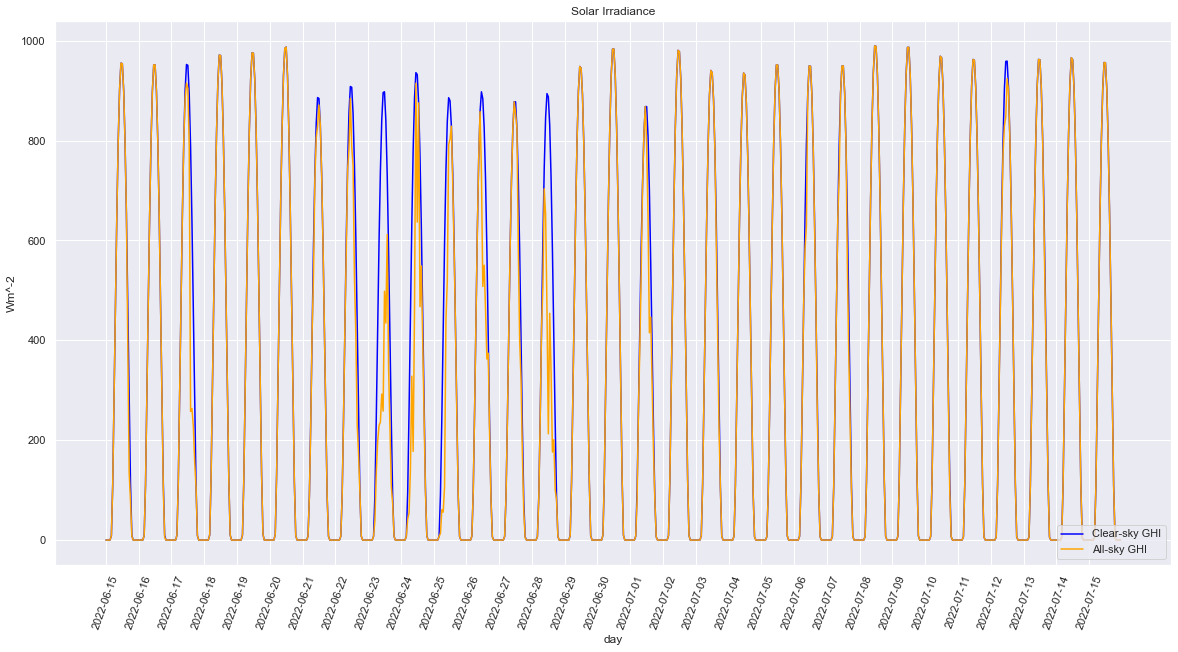

In [23]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Solar Irradiance")
ax.set_xlabel("day")
ax.set_ylabel("Wm^-2");
ax.set_xticks(days)
ax.set_xticklabels(days, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt_cs_ghi = plt.plot(cs_ghi_ts, color='blue')
plt_ghi = plt.plot(ghi_ts, color='orange')
plt.legend((plt_cs_ghi[0], plt_ghi[0]), ['Clear-sky GHI', 'All-sky GHI'], loc='lower right')

From the plot we can see that the day of the strongest irradiance attenuation is June 23th. 

<div class="alert alert-info" role="alert">

## <a id='Strongest-solar-radiation-attenuation'></a>5. Strongest solar radiation attenuation
[Back to top](#TOC_TOP)

</div>

we may want to automate the procedure, we implement the required steps. We first extract the daily maximum GHI (all-sky) irradiance and the daily maximum clear-sky irradiance. We then compute the ratios of the maximum values to find out the minimum ratio and the day in which it occurred.  

### Extracting the daily maximum GHI and Clear-sky GHI
We extract the all-sky GHI maximum values from the hourly observations for each day in the selected time interval and store them in a time-series.

In [24]:
daily_max_ghi = [ghi_ts[day.strftime('%Y-%m-%d')].max() for day in days]
daily_max_ghi_ts = pd.Series(daily_max_ghi, index=days)

We do the same with the Clear-sky GHI 

In [25]:
daily_max_cs_ghi = [cs_ghi_ts[day.strftime('%Y-%m-%d')].max() for day in days]
daily_max_cs_ghi_ts = pd.Series(daily_max_cs_ghi, index=days)

We compute the ratio of the maximum all-sky GHI and maximum Clear-sky GHI for each day in the selected time interval and then we extract the minimum value of the ratio and the day in which it occurred.

In [26]:
ratios = [daily_max_ghi_ts[day] / daily_max_cs_ghi_ts[day] for day in days] 
ratios_ts = pd.Series(ratios, index=days)
min_ratio = ratios_ts.min()
strongest_attenuation_day = ratios_ts.idxmin().strftime('%Y-%m-%d')
print("Day of strongest attenuation: {0:4s}\nAttenuation: {1:.4f}".format(strongest_attenuation_day, min_ratio))

Day of strongest attenuation: 2022-06-23
Attenuation: 0.6818


We have successfully tested the CAMS solar radiation service API. It works well and it's easy to install and use. The CAMS solar radiation service is only one among many other data sets available as time series that provide reliable and high quality information about the atmosphere. This test has certainly awakened my appetite to use the other APIs and to learn more about the science behind the production of the data.      

<div class="alert alert-info" role="alert">

## <a id='References'></a>6. References
[Back to top](#TOC_TOP)

</div>

1. [ECMWF - User Guide to the CAMS Radiation Service (CRS)](https://atmosphere.copernicus.eu/sites/default/files/2021-05/CAMS72_2018SC1_D72.4.3.1_2021_UserGuide_v1.pdf)
2. [M. Lefevre et al. McClear: a new model estimating downwelling solar radiation at ground level in clear-sky conditions](https://amt.copernicus.org/articles/6/2403/2013/amt-6-2403-2013.pdf)
3. [Qu et al. Fast radiative transfer parameterisation for assessing the surface solar irradiance: The Heliosat‑4 method](https://dx.doi.org/10.1127/metz/2016/0781)
4. [EUMETSAT - 0 Degree service: Providing High Rate SEVIRI image data in near real time](https://www.eumetsat.int/0-degree-service) 